<a href="https://colab.research.google.com/github/RWLab/equity-factors-pod/blob/main/optionss/Degenerate_Pricing_of_a_Call_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pricing a Simple Call Option Like a Bet

This notebook accompanies the following lesson: https://robotwealth.com/courses/options-for-degenerate-gamblers/lessons/planning-and-background-material/topic/options-for-degenerate-gamblers-background-and-initial-thoughts/

In [1]:
install.packages('tidyverse')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Calculate probability density of GBM price process for price S at time t
# S - price to get probability for
# mu - mean of return process (for 1 step)
# sd - sd of return process (for 1 step)
# t - number of steps
gbmpdf <- function(x, mu, sig, x0, t) {
  if (x == 0) return(0)
  exp(-(((-t*(mu - (0.5*sig^2))) + log(x) - log(x0))^2) / (2*t*sig^2)) / (sqrt(2*pi) * sqrt(t) * x * sig)
}

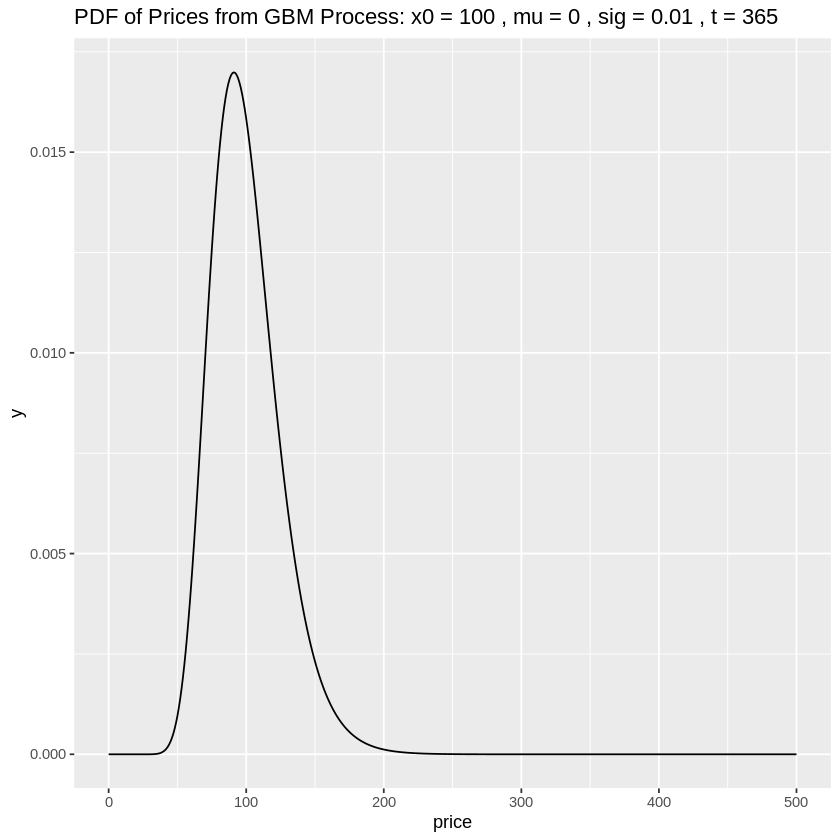

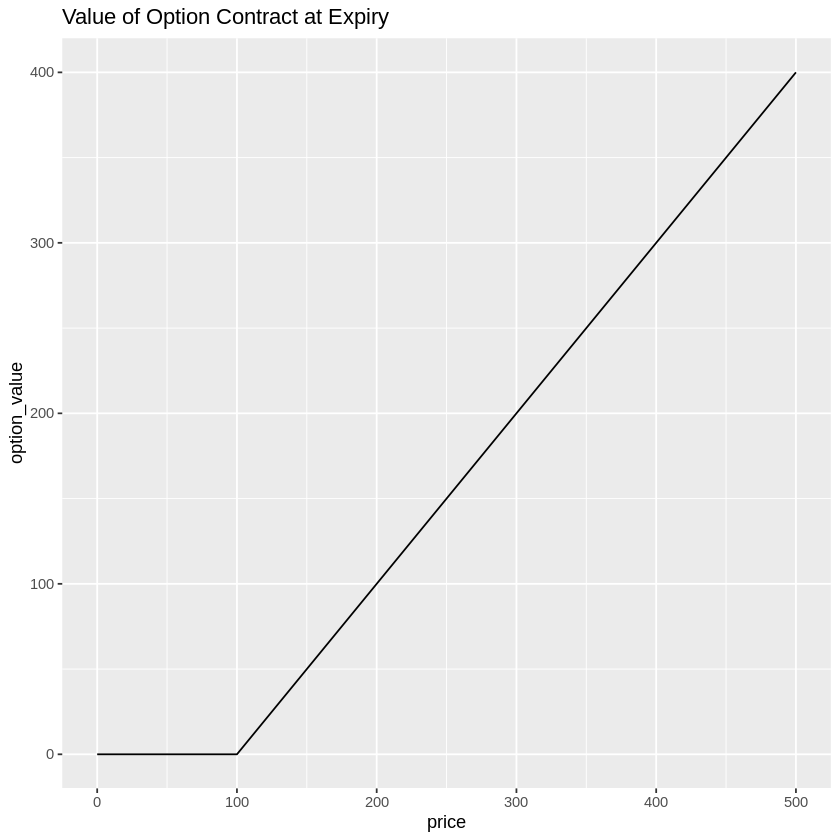

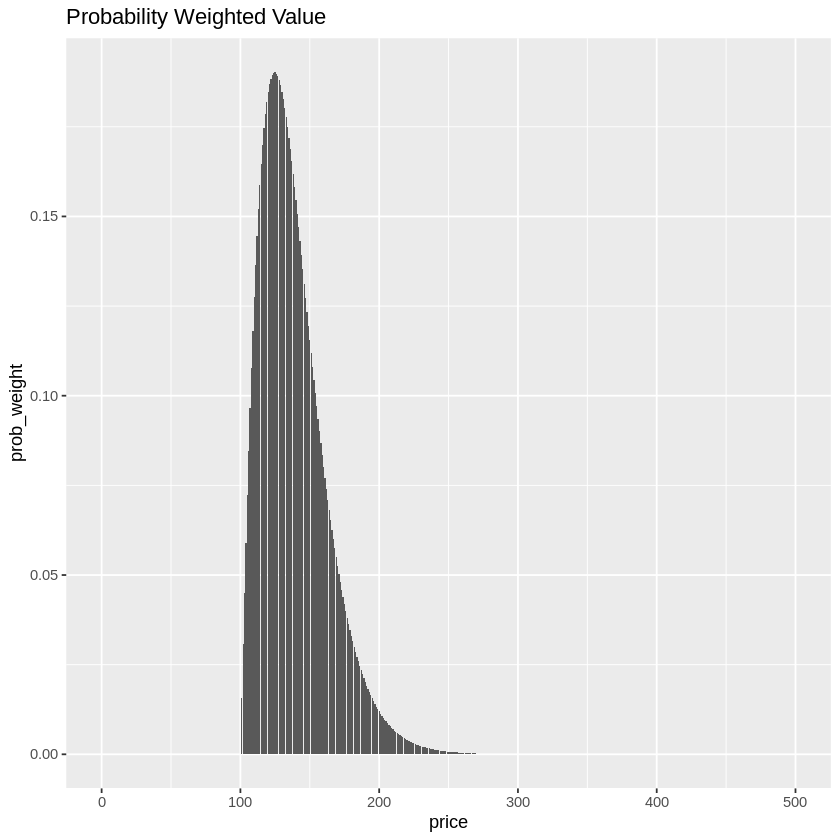

In [4]:
# Example, stock at $100 annualised vol 100% in 365 days time
x0 <- 100
mu <- 0
sig <- 0.25 / sqrt(365)
t <- 365

price <- seq(0, 500, by = 1) 
y <- sapply(price, gbmpdf, mu=mu, sig=sig, x0=x0, t=t) 

data <- data.frame(x=price, y=y) %>% 
  mutate(
    option_value = case_when(x <= 100 ~ 0, TRUE ~ x-100),
    prob_weight = option_value * y
  )

data %>%
  ggplot(aes(x=price, y=y)) + 
  geom_line() +
  ggtitle(paste('PDF of Prices from GBM Process: x0 =', x0, ', mu =', mu, ', sig =', round(sig,2), ', t =', t))

data %>% 
  ggplot(aes(x=price, y=option_value)) + 
  geom_line() + 
  ggtitle('Value of Option Contract at Expiry')

data %>% 
  ggplot(aes(x=price, y=prob_weight)) + 
  geom_bar(stat='identity') + 
  ggtitle('Probability Weighted Value')

In [5]:
data %>% 
  summarize(option_price = sum(prob_weight))

option_price
<dbl>
9.946325
